In [1]:
# Import all the required module for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Read the csv data
filename = 'Resources/survey_results_public.csv'

df = pd.read_csv(filename, low_memory=False)
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AIDangerous,AIInteresting,AIResponsible,AIFuture,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Artificial intelligence surpassing human intel...,A governmental or other regulatory body,"I don't care about it, or I haven't thought ab...",I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Algorithms making important decisions,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old


In [3]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'JobSearchStatus', 'LastNewJob', 'UpdateCV',
       'Currency', 'SalaryType', 'ConvertedSalary', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Exercise', 'Gender', 'SexualOrientation',
       'EducationParents', 'RaceEthnicity', 'Age'],
      dtype='object')

In [4]:
# Calculating Company Size distribution
company_df = df[['Respondent','CompanySize']].dropna(how='any')
company_group_df = company_df.groupby('CompanySize')
company_size_count_df = company_group_df['CompanySize'].count()
total_responsdent_cs = company_size_count_df.sum()
company_size_percentage_df = (company_group_df['CompanySize'].count()/total_responsdent_cs) * 100
company_size_df = pd.DataFrame({ 'Count': company_size_count_df,
                                 'Percentage': company_size_percentage_df })
company_size_df = company_size_df.sort_values(['Count'], ascending=True)
company_size_df = company_size_df.reset_index(drop=False)

company_size_df

,CompanySize,Count,Percentage
0,"5,000 to 9,999 employees",3017,4.217752
1,500 to 999 employees,4630,6.472718
2,Fewer than 10 employees,7479,10.455607
3,"1,000 to 4,999 employees",7634,10.672296
4,10 to 19 employees,8007,11.193748
5,"10,000 or more employees",9757,13.640240
6,100 to 499 employees,14011,19.587312
7,20 to 99 employees,16996,23.760328


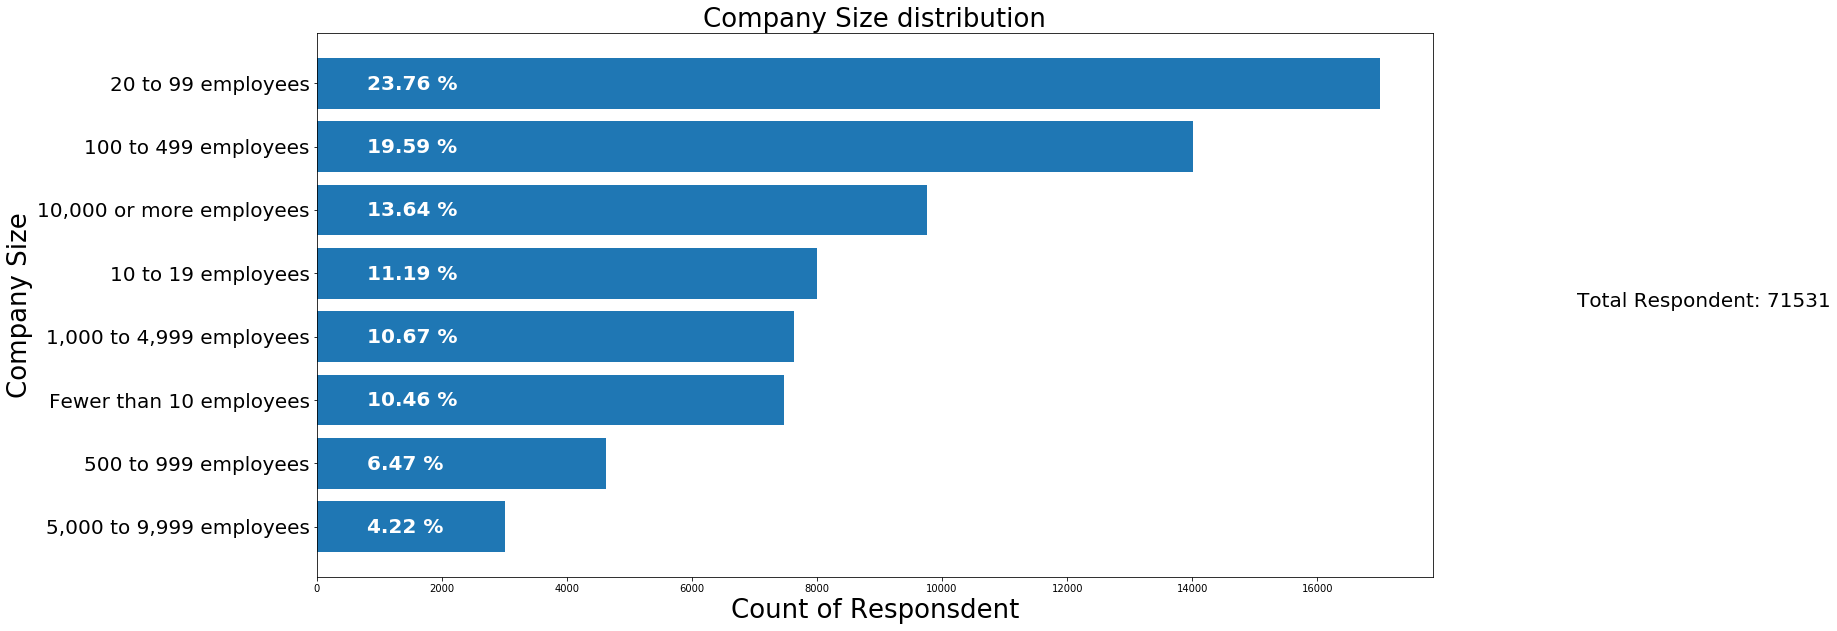

In [5]:
# Bar Plot for Company-Size Distribution
y_axis = np.arange(len(company_size_df))
plt.figure(figsize=(20, 10))
plt.barh(y_axis, company_size_df['Count'])
plt.yticks(y_axis, company_size_df['CompanySize'], rotation=0, ha='right', fontsize=20)
plt.title('Company Size distribution', fontsize=26)
plt.ylabel('Company Size', fontsize=26)
plt.xlabel('Count of Responsdent', fontsize=26)

for i, v in enumerate(company_size_df['Percentage']):
    plt.text(800, i - 0.10 , "{0:.2f} %".format(v), color='white', fontweight='bold', fontsize=20)
    
plt.gcf().text(1, 0.5, f'Total Respondent: {total_responsdent_cs}', fontsize=20)

plt.savefig('Images/company-size-distribution.png', bbox_inches='tight')

In [6]:
# Get the relevant Employment Type Columns
employment_df = df[['Respondent','Employment']].dropna(how='any')
employment_group_df = employment_df.groupby('Employment')
employment_group_df['Respondent'].count()

Employment
Employed full-time                                      70495
Employed part-time                                       5380
Independent contractor, freelancer, or self-employed     9282
Not employed, and not looking for work                   4132
Not employed, but looking for work                       5805
Retired                                                   227
Name: Respondent, dtype: int64

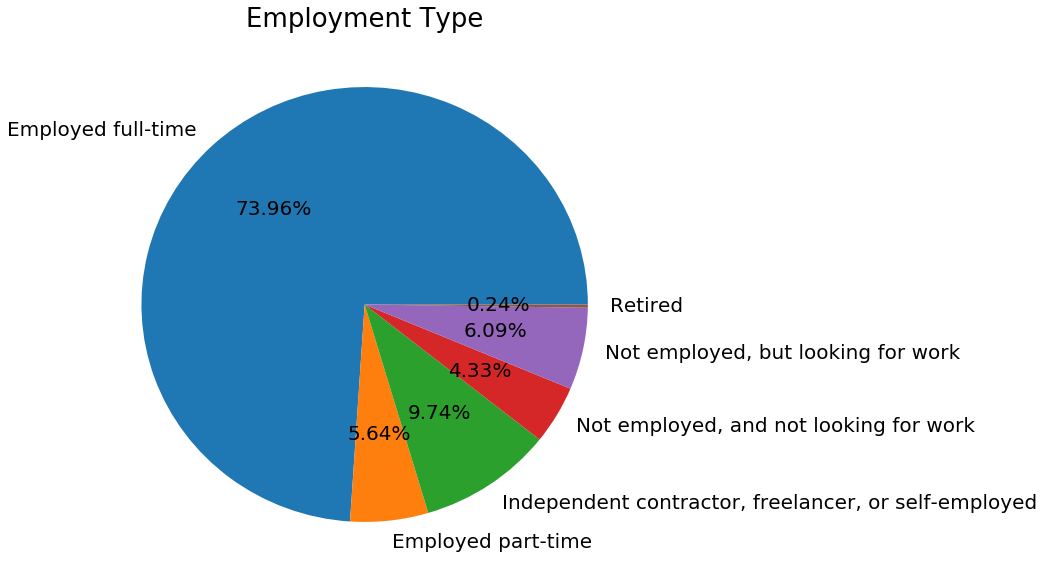

In [7]:
plt.figure(figsize=(10,10))
plt.pie(employment_group_df['Respondent'].count(),
        labels=employment_group_df['Respondent'].count().index,
        autopct='%.2f%%', rotatelabels=0, textprops={'fontsize': 20})
plt.title('Employment Type', fontsize=26)
plt.savefig('Images/employment-type-piechart.png', bbox_inches='tight')

In [8]:
# Get relevant columns for Employment and Country
employment_country_df = df[['Respondent','Employment', 'Country']].dropna(how='any')


In [9]:
# Get the top 10 Country
country_top_10 = employment_country_df['Country'].value_counts().head(10)

# Get the top 10 Employment type
employment_top_10 = employment_country_df['Employment'].value_counts().head(10)

In [10]:
# Create a new empty dataframe with columns as 'employment type' and index as country
country_employment_df = pd.DataFrame(columns = employment_top_10.index, index = country_top_10.index)

# fill the above data frame with actual value
for index, row in country_employment_df.iterrows():
    for col in country_employment_df.columns:
        count = len(employment_country_df.loc[(employment_country_df['Country'] == index) & (employment_country_df['Employment'] == col)])
        row[col] = count

country_employment_df

,Employed full-time,"Independent contractor, freelancer, or self-employed","Not employed, but looking for work",Employed part-time,"Not employed, and not looking for work",Retired
United States,16031,1308,956,870,710,73
India,10252,804,1210,257,498,4
Germany,4383,553,195,812,279,14
United Kingdom,4776,705,190,142,267,30
Canada,2474,317,183,160,169,11
Russian Federation,1971,290,219,163,104,7
France,1870,246,95,177,116,6
Brazil,1706,286,166,228,69,0
Poland,1330,372,90,182,96,1
Australia,1483,198,94,118,71,6


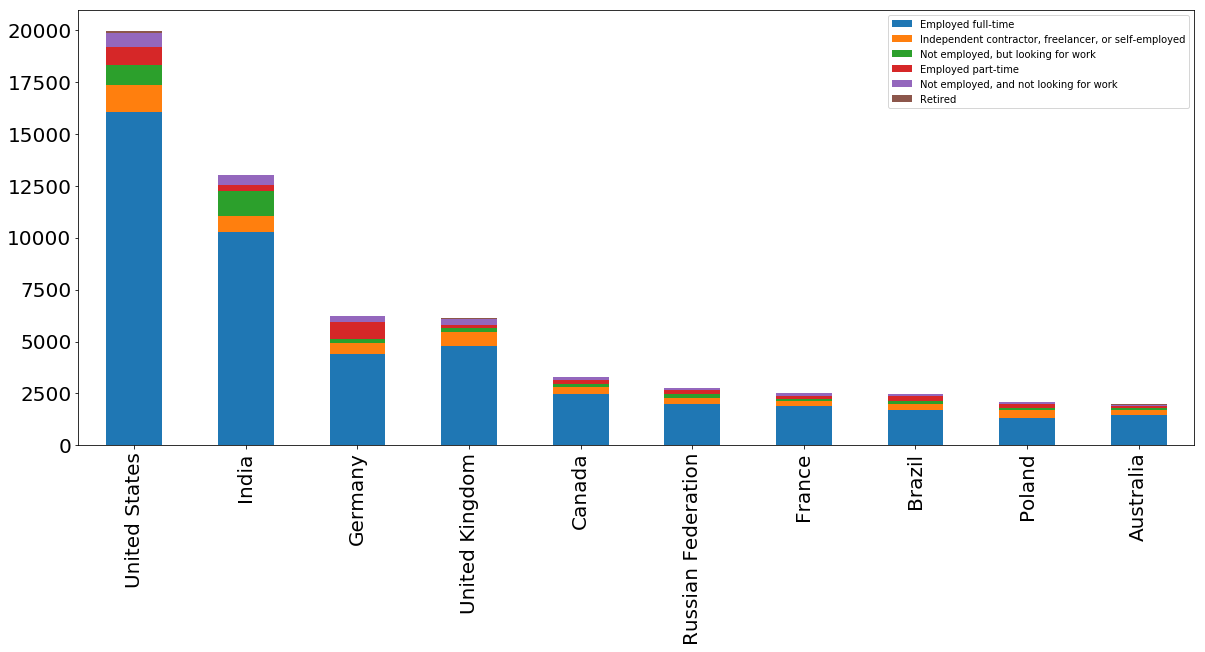

In [11]:
# Stack barplot of Top 10 Country with Top Employment type
country_employment_df.plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=20)
plt.savefig('Images/country-employment-barplot.png', bbox_inches='tight')

In [12]:
# Current Job Statisfaction
job_statisfaction_df = df[['Respondent', 'JobSatisfaction']].dropna(how='any')
job_statisfaction_df['JobSatisfaction'].value_counts()

Moderately satisfied                  26005
Extremely satisfied                   12436
Slightly satisfied                    10012
Slightly dissatisfied                  7057
Moderately dissatisfied                6318
Neither satisfied nor dissatisfied     4966
Extremely dissatisfied                 2482
Name: JobSatisfaction, dtype: int64

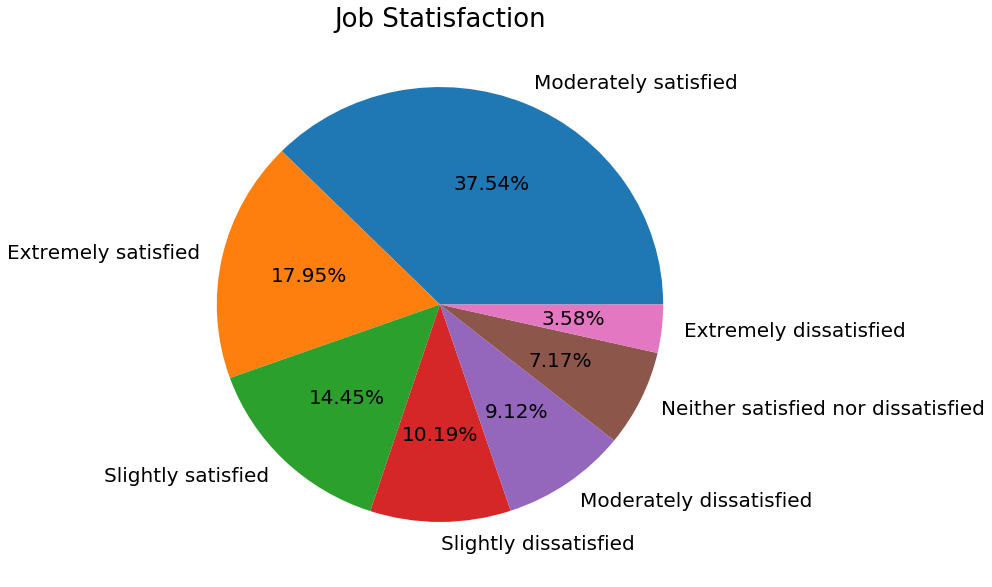

In [13]:
# Plot Job Statisfaction in Pie
plt.figure(figsize=(10,10))
plt.pie(job_statisfaction_df['JobSatisfaction'].value_counts(),
        labels=job_statisfaction_df['JobSatisfaction'].value_counts().index,
        autopct='%.2f%%', rotatelabels=0, textprops={'fontsize': 20})
plt.title('Job Statisfaction', fontsize=26)
plt.savefig('Images/job-statisfaction-piechart.png', bbox_inches='tight')

In [14]:
# Current Career Statisfaction
career_statisfaction_df = df[['Respondent', 'CareerSatisfaction']].dropna(how='any')
career_statisfaction_all_country_df = df[['Respondent', 'CareerSatisfaction', 'Country']].dropna(how='any')
career_statisfaction_us_df = career_statisfaction_all_country_df.loc[career_statisfaction_all_country_df['Country'] == 'United States']

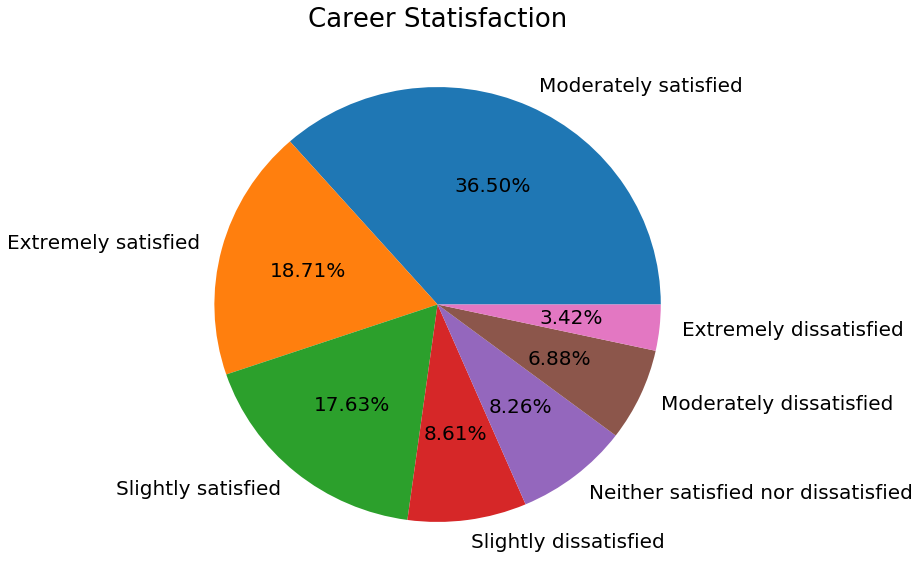

In [15]:
# Plot Career Statisfaction in Pie
plt.figure(figsize=(10,10))
plt.pie(career_statisfaction_df['CareerSatisfaction'].value_counts(),
        labels=career_statisfaction_df['CareerSatisfaction'].value_counts().index,
        autopct='%.2f%%', rotatelabels=0, textprops={'fontsize': 20})
plt.title('Career Statisfaction', fontsize=26)
plt.savefig('Images/career-statisfaction-piechart.png', bbox_inches='tight')

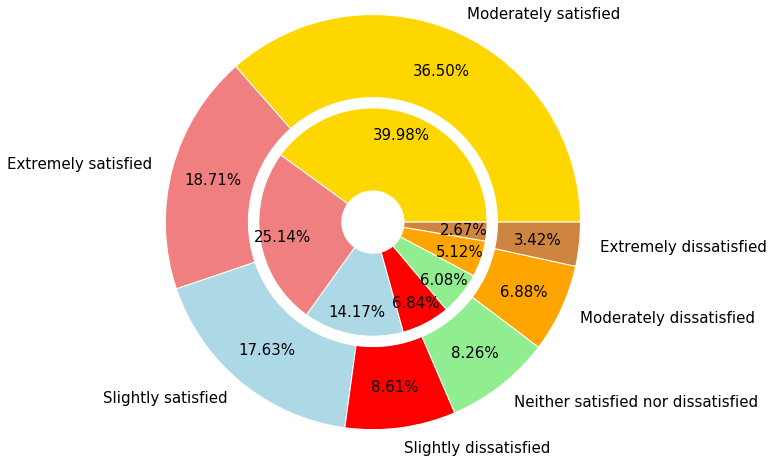

In [16]:
# Plot Career Statisfaction in Pie
#plt.figure(figsize=(10,10))
pie1_colors = ['gold', 'lightcoral', 'lightblue', 'red', 'lightgreen', 'orange', 'peru']
pie2_colors = ['goldenrod', 'coral', 'navy', 'darkred', 'green', 'darkorange', 'brown']
fig, ax = plt.subplots()
ax.axis('equal')
#ax.set_title('Career Statisfaction', fontsize=26)

mypie1, _, _ = ax.pie(career_statisfaction_all_country_df['CareerSatisfaction'].value_counts(),
                labels=career_statisfaction_all_country_df['CareerSatisfaction'].value_counts().index, colors=pie1_colors,
                autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 15}, radius=2)

plt.setp( mypie1, width=0.8, edgecolor='white')

mypie2, _, _ = ax.pie(career_statisfaction_us_df['CareerSatisfaction'].value_counts(),
                colors=pie1_colors,
                autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 15}, radius=2-0.9)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.tight_layout()

plt.savefig('Images/career-statisfaction-us-vs-rest-country-donut-chart.png', bbox_inches='tight')

In [17]:
# Current Job Search Status
job_search_status_df = df[['Respondent', 'JobSearchStatus']].dropna(how='any')
job_search_status_df['JobSearchStatus'].value_counts()

I’m not actively looking, but I am open to new opportunities    47556
I am not interested in new job opportunities                    19296
I am actively looking for a job                                 12636
Name: JobSearchStatus, dtype: int64

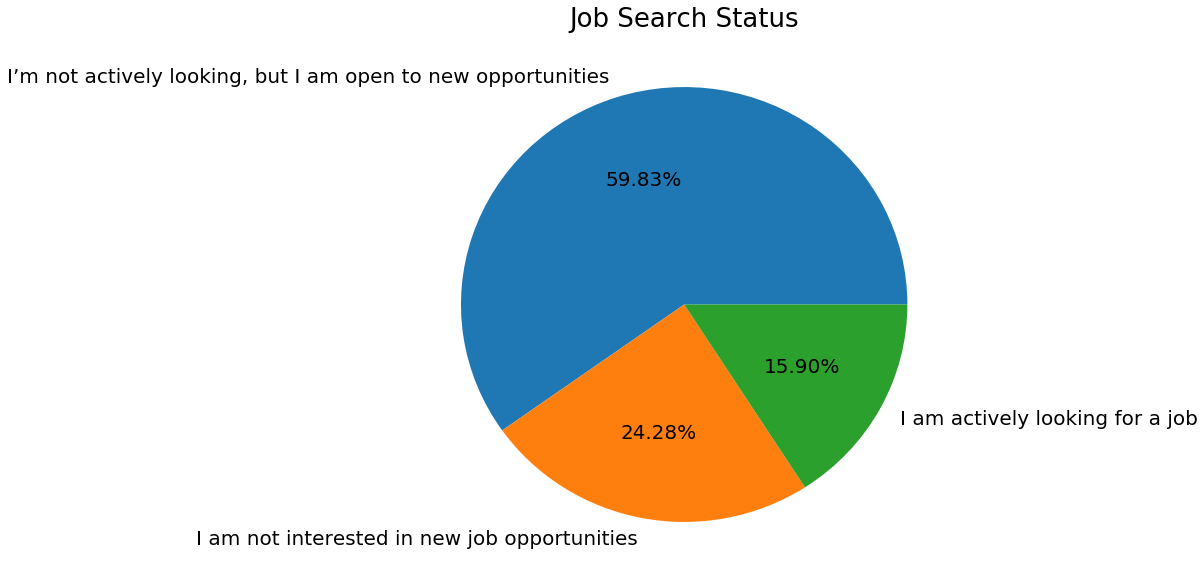

In [18]:
# Plot Current Job Search status in Pie
plt.figure(figsize=(10,10))
plt.pie(job_search_status_df['JobSearchStatus'].value_counts(),
        labels=job_search_status_df['JobSearchStatus'].value_counts().index,
        autopct='%.2f%%', rotatelabels=0, textprops={'fontsize': 20})
plt.title('Job Search Status', fontsize=26)
plt.savefig('Images/job-search-status-piechart.png', bbox_inches='tight')

In [19]:
# Job Hopping
job_hopping_df = df[['Respondent', 'LastNewJob']].dropna(how='any')
job_hopping_df['LastNewJob'].value_counts()

Less than a year ago         27321
Between 1 and 2 years ago    17332
More than 4 years ago        14871
Between 2 and 4 years ago    14792
I've never had a job          4573
Name: LastNewJob, dtype: int64

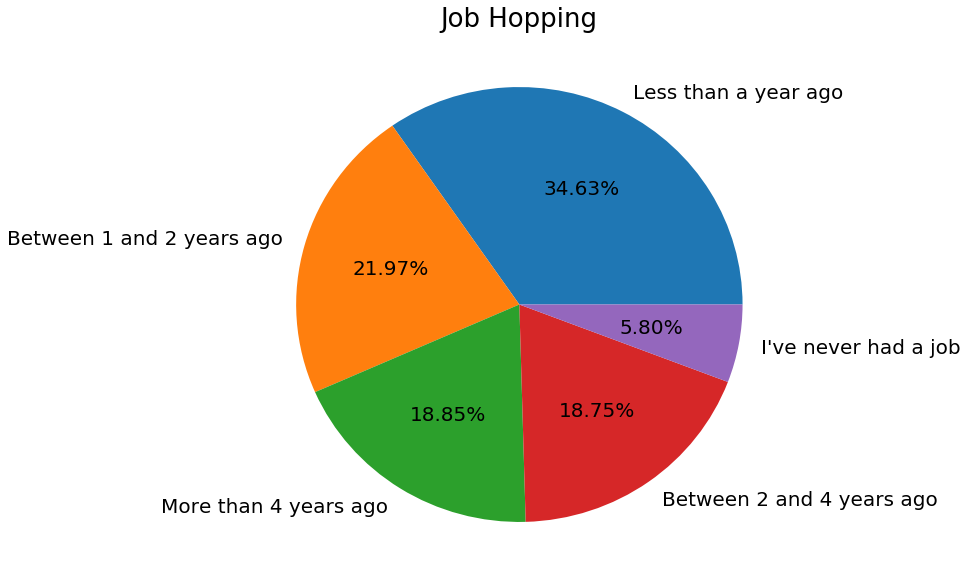

In [20]:
# Plot Job Hopping in Pie
plt.figure(figsize=(10,10))
plt.pie(job_hopping_df['LastNewJob'].value_counts(),
        labels=job_hopping_df['LastNewJob'].value_counts().index,
        autopct='%.2f%%', rotatelabels=0, textprops={'fontsize': 20})
plt.title('Job Hopping', fontsize=26)
plt.savefig('Images/job-hopping-piechart.png', bbox_inches='tight')

In [21]:
# Experience
experience_df = df[['Respondent', 'YearsCodingProf']].dropna(how='any')

experience_group_df = experience_df.groupby('YearsCodingProf')
experience_count_df = experience_group_df['YearsCodingProf'].count()
total_responsdent_exp = experience_count_df.sum()
experience_percentage_df = (experience_group_df['YearsCodingProf'].count()/total_responsdent_exp) * 100
experience_df = pd.DataFrame({ 'Count': experience_count_df,
                               'Percentage': experience_percentage_df })
experience_df = experience_df.sort_values(['Count'], ascending=True)
experience_df = experience_df.reset_index(drop=False)

experience_df

,YearsCodingProf,Count,Percentage
0,27-29 years,506,0.649526
1,24-26 years,857,1.100086
2,30 or more years,1302,1.671309
3,21-23 years,1368,1.756030
4,18-20 years,2830,3.632723
5,15-17 years,3012,3.866347
6,12-14 years,4287,5.502997
7,9-11 years,7573,9.721063
8,6-8 years,11385,14.614328
9,3-5 years,21362,27.421280


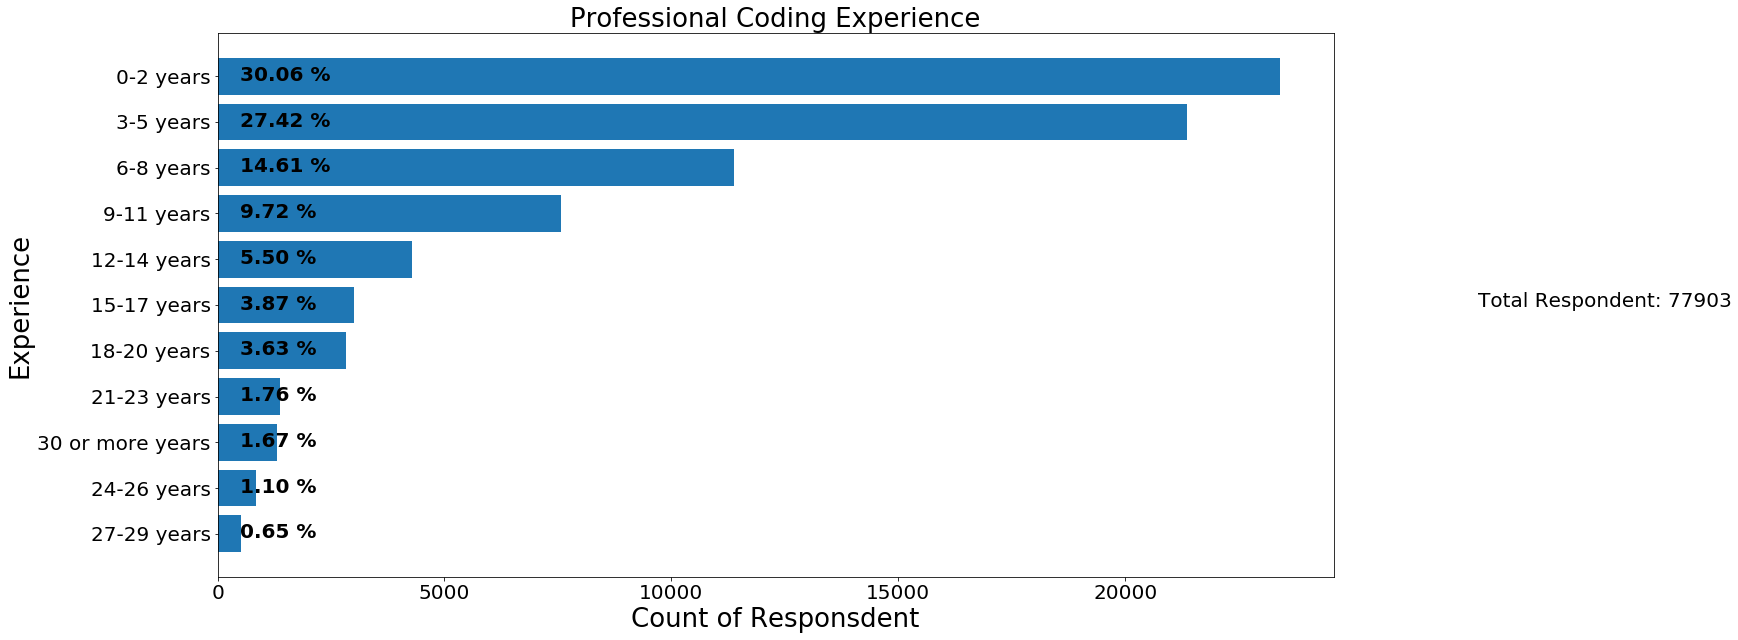

In [22]:
# Bar Plot for Professional Coding Experience Distribution
y_axis = np.arange(len(experience_df))
plt.figure(figsize=(20, 10))
plt.barh(y_axis, experience_df['Count'])
plt.yticks(y_axis, experience_df['YearsCodingProf'], rotation=0, ha='right', fontsize=20)
plt.xticks(fontsize=20)
plt.title('Professional Coding Experience', fontsize=26)
plt.ylabel('Experience', fontsize=26)
plt.xlabel('Count of Responsdent', fontsize=26)

for i, v in enumerate(experience_df['Percentage']):
    plt.text(500, i - 0.10 , "{0:.2f} %".format(v), color='black', fontweight='bold', fontsize=20)
    
plt.gcf().text(1, 0.5, f'Total Respondent: {total_responsdent_exp}', fontsize=20)

plt.savefig('Images/experience-distribution.png', bbox_inches='tight')

In [23]:
# Version Control tool
version_control_df = df[['Respondent', 'VersionControl']].dropna(how='any')

version_control_dict = {}

for index, row in version_control_df.iterrows():
    vcs = row['VersionControl'].split(';')
    for each_vcs in vcs:
        version_control_dict[each_vcs] = version_control_dict.get(each_vcs, 0) + 1

version_control_dict

{'Git': 64824,
 'Subversion': 11936,
 'Zip file back-ups': 5869,
 'Copying and pasting files to network shares': 5846,
 'Team Foundation Version Control': 8067,
 'Mercurial': 2680,
 "I don't use version control": 3562}

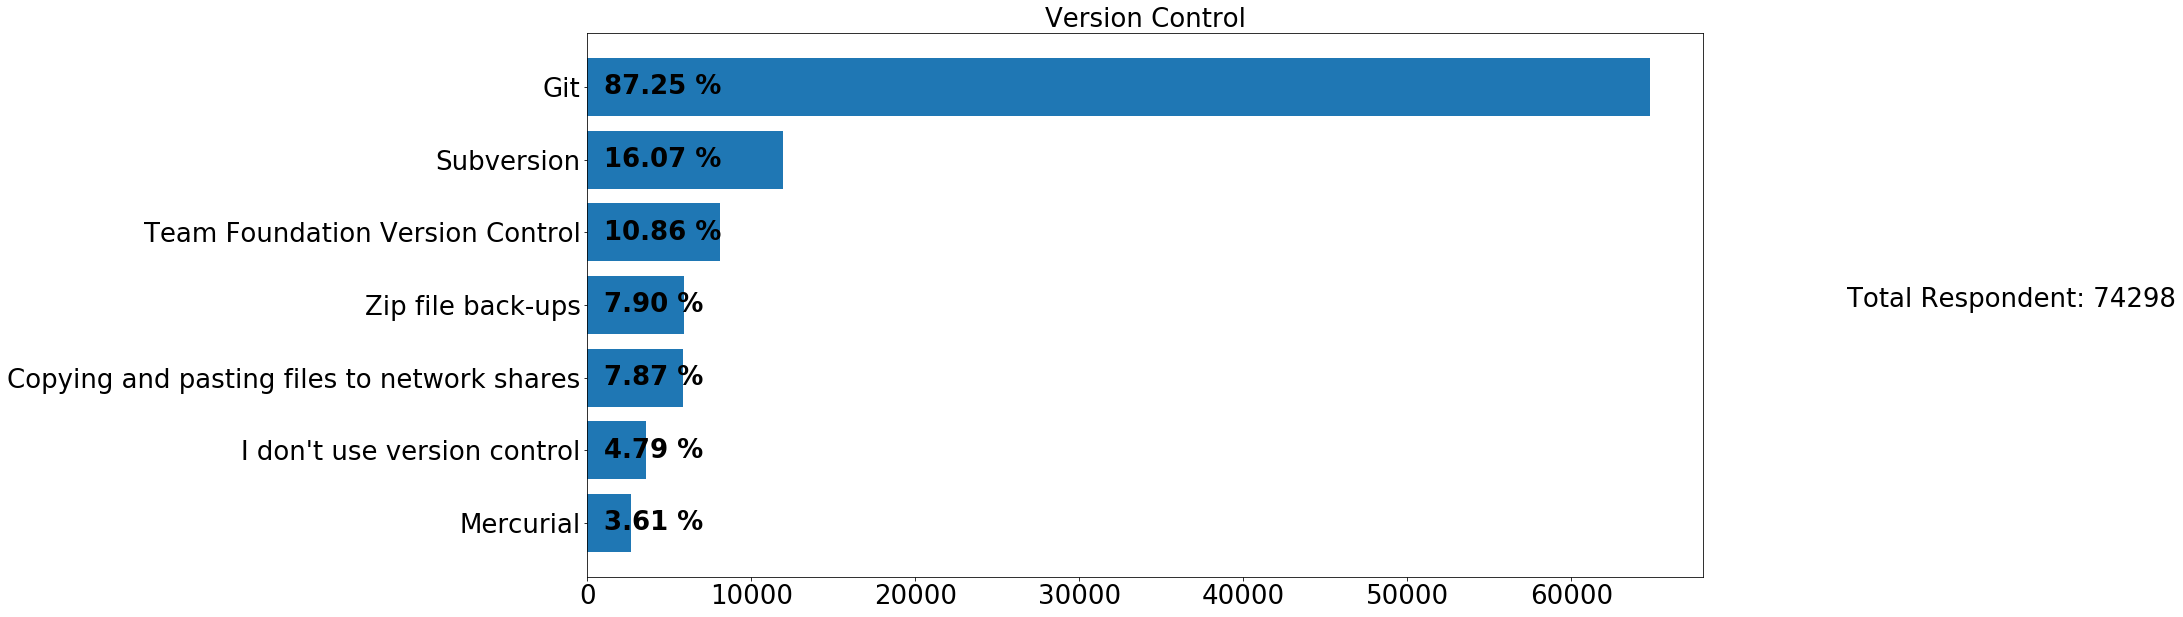

In [24]:
lists = sorted(version_control_dict.items(), key=lambda x: (x[1],x[0]), reverse=False)
version_control, count = zip(*lists)

# Plot Version control system
plt.figure(figsize=(20, 10))
plt.barh(range(len(version_control)), count)
plt.yticks(range(len(version_control)), version_control, rotation=360, ha='right', fontsize=26)
plt.xticks(fontsize=26)
plt.title('Version Control', fontsize=26)

for i, v in enumerate(count):
    percent = (v/len(version_control_df)) * 100
    plt.text(1000, i - 0.10 , "{0:.2f} %".format(percent), color='black', fontweight='bold', fontsize=26)

plt.gcf().text(1, 0.5, f'Total Respondent: {len(version_control_df)}', fontsize=26)
plt.savefig('Images/version-control-barplot-h.png', bbox_inches='tight')

In [25]:
# Check-in code stats 
check_in_df = df[['Respondent', 'CheckInCode']].dropna(how='any')

check_in_group_df = check_in_df.groupby('CheckInCode')
check_in_count_df = check_in_group_df['CheckInCode'].count()
total_responsdent_checkin = check_in_count_df.sum()
check_in_percentage_df = (check_in_group_df['CheckInCode'].count()/total_responsdent_checkin) * 100
check_in_df = pd.DataFrame({ 'Count': check_in_count_df,
                             'Percentage': check_in_percentage_df })
check_in_df = check_in_df.sort_values(['Count'], ascending=True)
check_in_df = check_in_df.reset_index(drop=False)

check_in_df


,CheckInCode,Count,Percentage
0,Never,1074,1.484348
1,Less than once per month,2337,3.229908
2,Weekly or a few times per month,4983,6.886877
3,Once a day,6587,9.103725
4,A few times per week,13808,19.083685
5,Multiple times per day,43566,60.211457


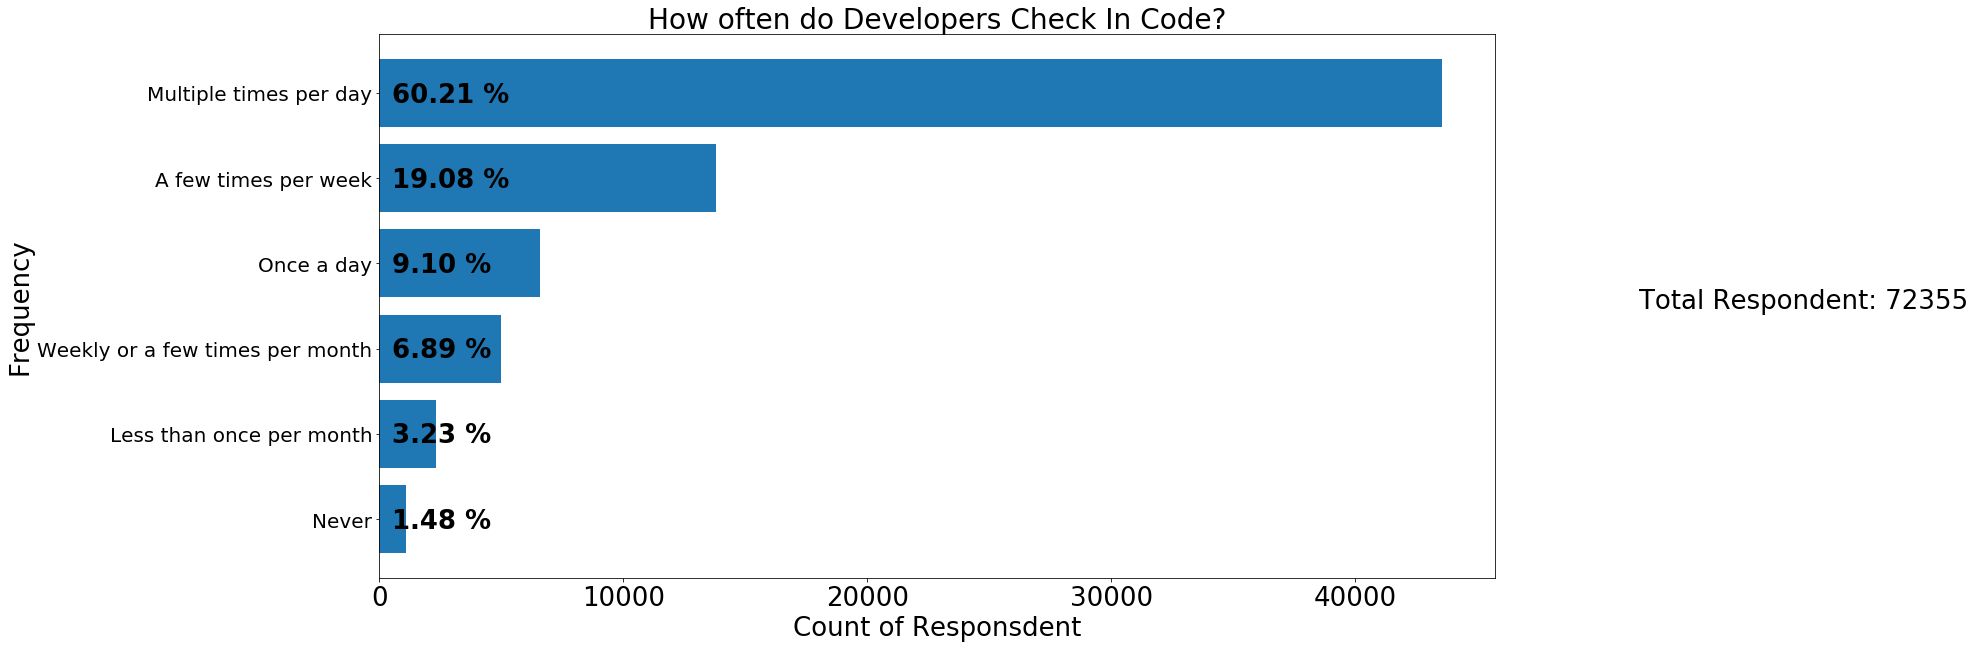

In [26]:
# Bar Plot for Professional Coding Experience Distribution
y_axis = np.arange(len(check_in_df))
plt.figure(figsize=(20, 10))
plt.barh(y_axis, check_in_df['Count'])
plt.yticks(y_axis, check_in_df['CheckInCode'], rotation=0, ha='right', fontsize=20)
plt.xticks(fontsize=26)
plt.title('How often do Developers Check In Code?', fontsize=28)
plt.ylabel('Frequency', fontsize=26)
plt.xlabel('Count of Responsdent', fontsize=26)

for i, v in enumerate(check_in_df['Percentage']):
    plt.text(500, i - 0.10 , "{0:.2f} %".format(v), color='black', fontweight='bold', fontsize=26)
    
plt.gcf().text(1, 0.5, f'Total Respondent: {total_responsdent_checkin}', fontsize=26)

plt.savefig('Images/check-in-code-plot.png', bbox_inches='tight')

In [27]:
# Developer Type vs Salary
developer_salary_df = df[['Respondent', 'DevType', 'ConvertedSalary', 'Country']].dropna(how='any')
developer_salary_df.count()

Respondent         47365
DevType            47365
ConvertedSalary    47365
Country            47365
dtype: int64

In [28]:
# Global Developer Salary
all_developer_salary_dict = dict()

for index, row in developer_salary_df.iterrows():
    salary = row['ConvertedSalary']
    dev_types = row['DevType'].split(';')
    for each_dev_type in dev_types:
        all_developer_salary_dict.setdefault(each_dev_type, []).append(salary)
 
# US Developer Salary
us_developer_salary_dict = dict()
us_developer_count = 0
for index, row in developer_salary_df.iterrows():
    country = row['Country']
    
    if country == 'United States':
        us_developer_count += 1
        salary = row['ConvertedSalary']
        dev_types = row['DevType'].split(';')
        for each_dev_type in dev_types:
            us_developer_salary_dict.setdefault(each_dev_type, []).append(salary)

In [29]:
# New Dataframe to hold Global mean and median salary by DevType
all_dev_type_salary_df = pd.DataFrame(columns=['DevType', 'Count', 'Mean', 'Median'])
index = 0;

for key, value in all_developer_salary_dict.items():
    all_dev_type_salary_df.at[index, 'DevType'] = key;
    all_dev_type_salary_df.at[index, 'Count'] = len(value)
    all_dev_type_salary_df.at[index, 'Mean'] = np.mean(value)
    all_dev_type_salary_df.at[index, 'Median'] = np.median(value)
    index += 1
    
all_dev_type_salary_df = all_dev_type_salary_df.sort_values('Median', ascending=False)
all_dev_type_salary_df = all_dev_type_salary_df.reset_index(drop=True)
all_dev_type_salary_df.head(10)

,DevType,Count,Mean,Median
0,Engineering manager,2973,129926,88573
1,DevOps specialist,6087,115029,72469
2,"C-suite executive (CEO, CTO, etc.)",1620,117667,69244
3,Product manager,2278,112144,63174
4,Data scientist or machine learning specialist,3763,101430,60000
5,Embedded applications or devices developer,2659,94803.1,59180
6,Full-stack developer,25339,100156,59000
7,Data or business analyst,4088,106542,58890.5
8,Desktop or enterprise applications developer,8807,96060.2,57480
9,System administrator,5745,101142,55562


In [30]:
# New Dataframe to hold US only mean and median salary by DevType
us_dev_type_salary_df = pd.DataFrame(columns=['DevType', 'Count', 'Mean', 'Median'])
index = 0;

for key, value in us_developer_salary_dict.items():
    us_dev_type_salary_df.at[index, 'DevType'] = key;
    us_dev_type_salary_df.at[index, 'Count'] = len(value)
    us_dev_type_salary_df.at[index, 'Mean'] = np.mean(value)
    us_dev_type_salary_df.at[index, 'Median'] = np.median(value)
    index += 1
    
us_dev_type_salary_df = us_dev_type_salary_df.sort_values('Median', ascending=True)
us_dev_type_salary_df = us_dev_type_salary_df.reset_index(drop=True)
us_dev_type_salary_df

,DevType,Count,Mean,Median
0,Student,902,84735.3,36000
1,QA or test developer,1166,138317,83000
2,Designer,1544,149412,85000
3,Marketing or sales professional,138,150800,86750
4,Educator or academic researcher,404,133316,87750
5,Data or business analyst,1268,156883,90000
6,Database administrator,1906,163986,90000
7,Game or graphics developer,472,132309,90000
8,Front-end developer,5095,152456,93000
9,System administrator,1585,154767,93000


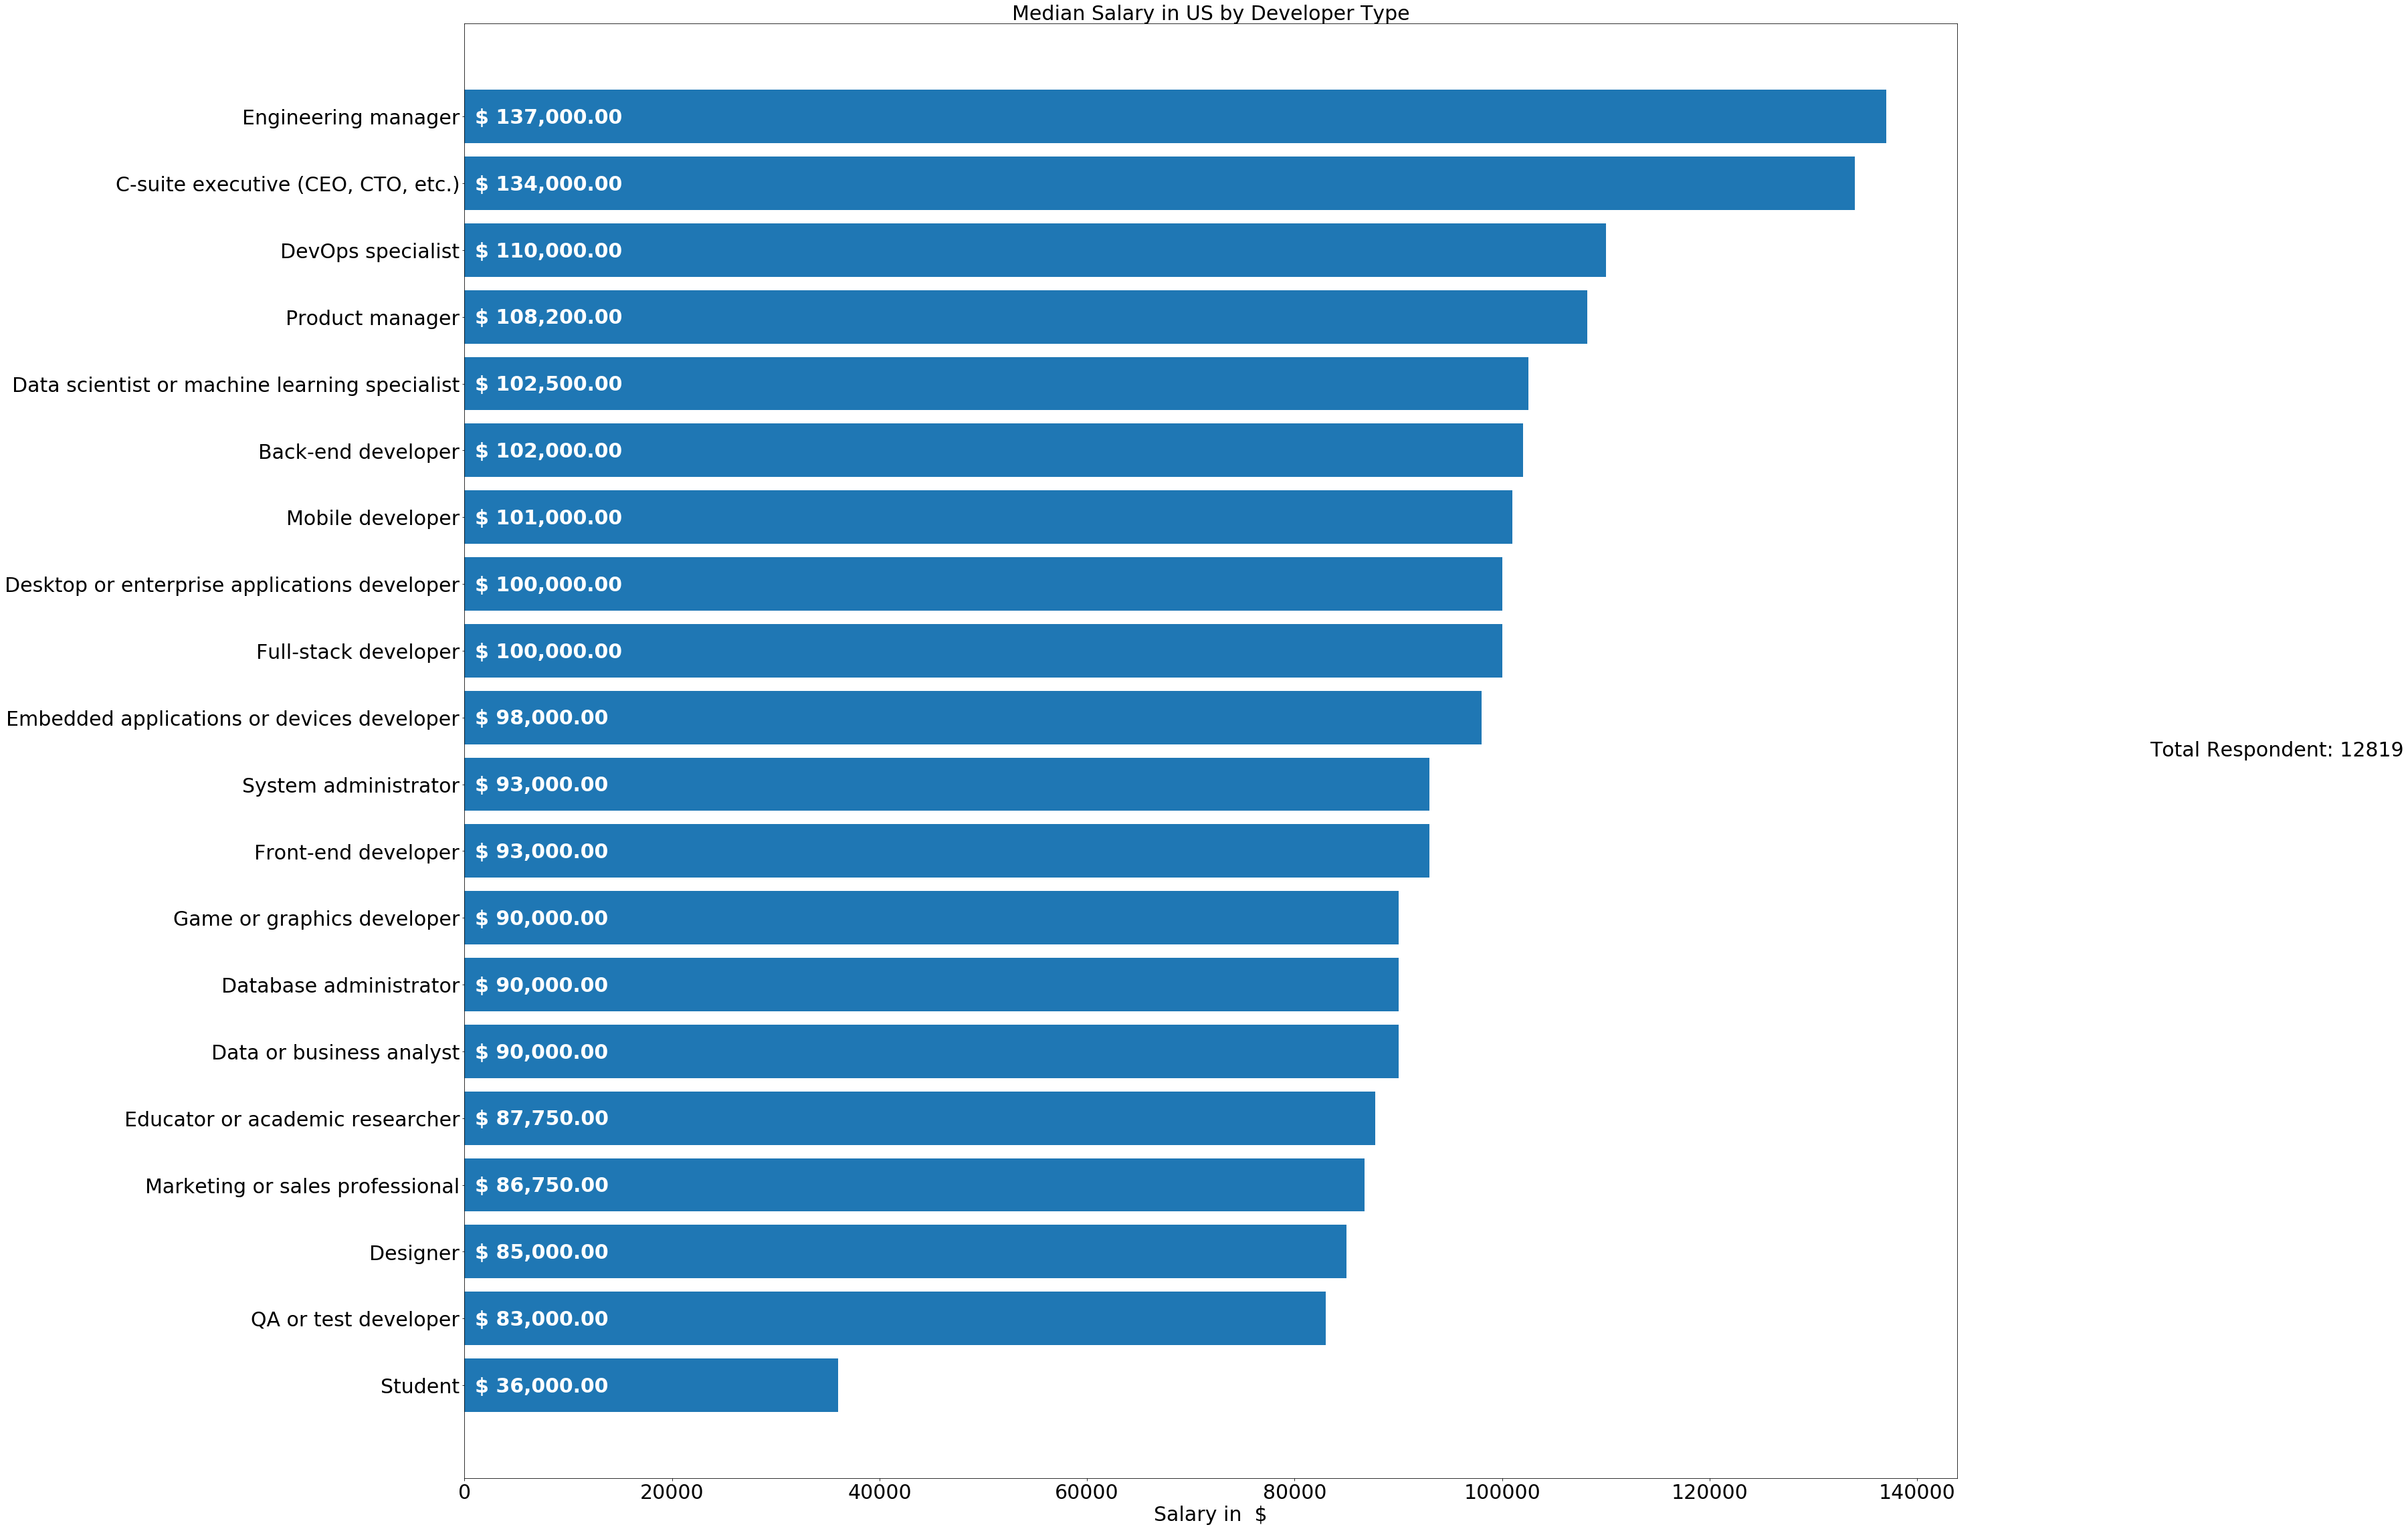

In [31]:
# Plot Developer system
plt.figure(figsize=(40, 40))
plt.barh(range(len(us_dev_type_salary_df)), us_dev_type_salary_df.Median)
plt.yticks(range(len(us_dev_type_salary_df)), us_dev_type_salary_df.DevType, rotation=360, ha='right', fontsize=30)
plt.xticks(fontsize=30)
plt.title('Median Salary in US by Developer Type', fontsize=30)
plt.xlabel('Salary in  $', fontsize=30)

for i, v in enumerate(us_dev_type_salary_df.Median):
    plt.text(1000, i - 0.10 , "$ {0:,.2f}".format(v), color='white', fontweight='bold', fontsize=30)

plt.gcf().text(1, 0.5, f'Total Respondent: {us_developer_count}', fontsize=30)
plt.savefig('Images/developer-type-vs-salary.png', bbox_inches='tight')

In [32]:
# database stats
database_df = df[['Respondent', 'DatabaseWorkedWith']].dropna(how='any')

# Dictionary to store unique database key and its counter
database_dict = dict()

# Loop over the dataframe to extract count of database
for index, row in database_df.iterrows():
    dbs = row['DatabaseWorkedWith'].split(';')
    for each_db in dbs:
        database_dict[each_db] = database_dict.get(each_db, 0) + 1

db_lists = sorted(database_dict.items(), key=lambda x: (x[1],x[0]), reverse=False)
database, db_count = zip(*db_lists)

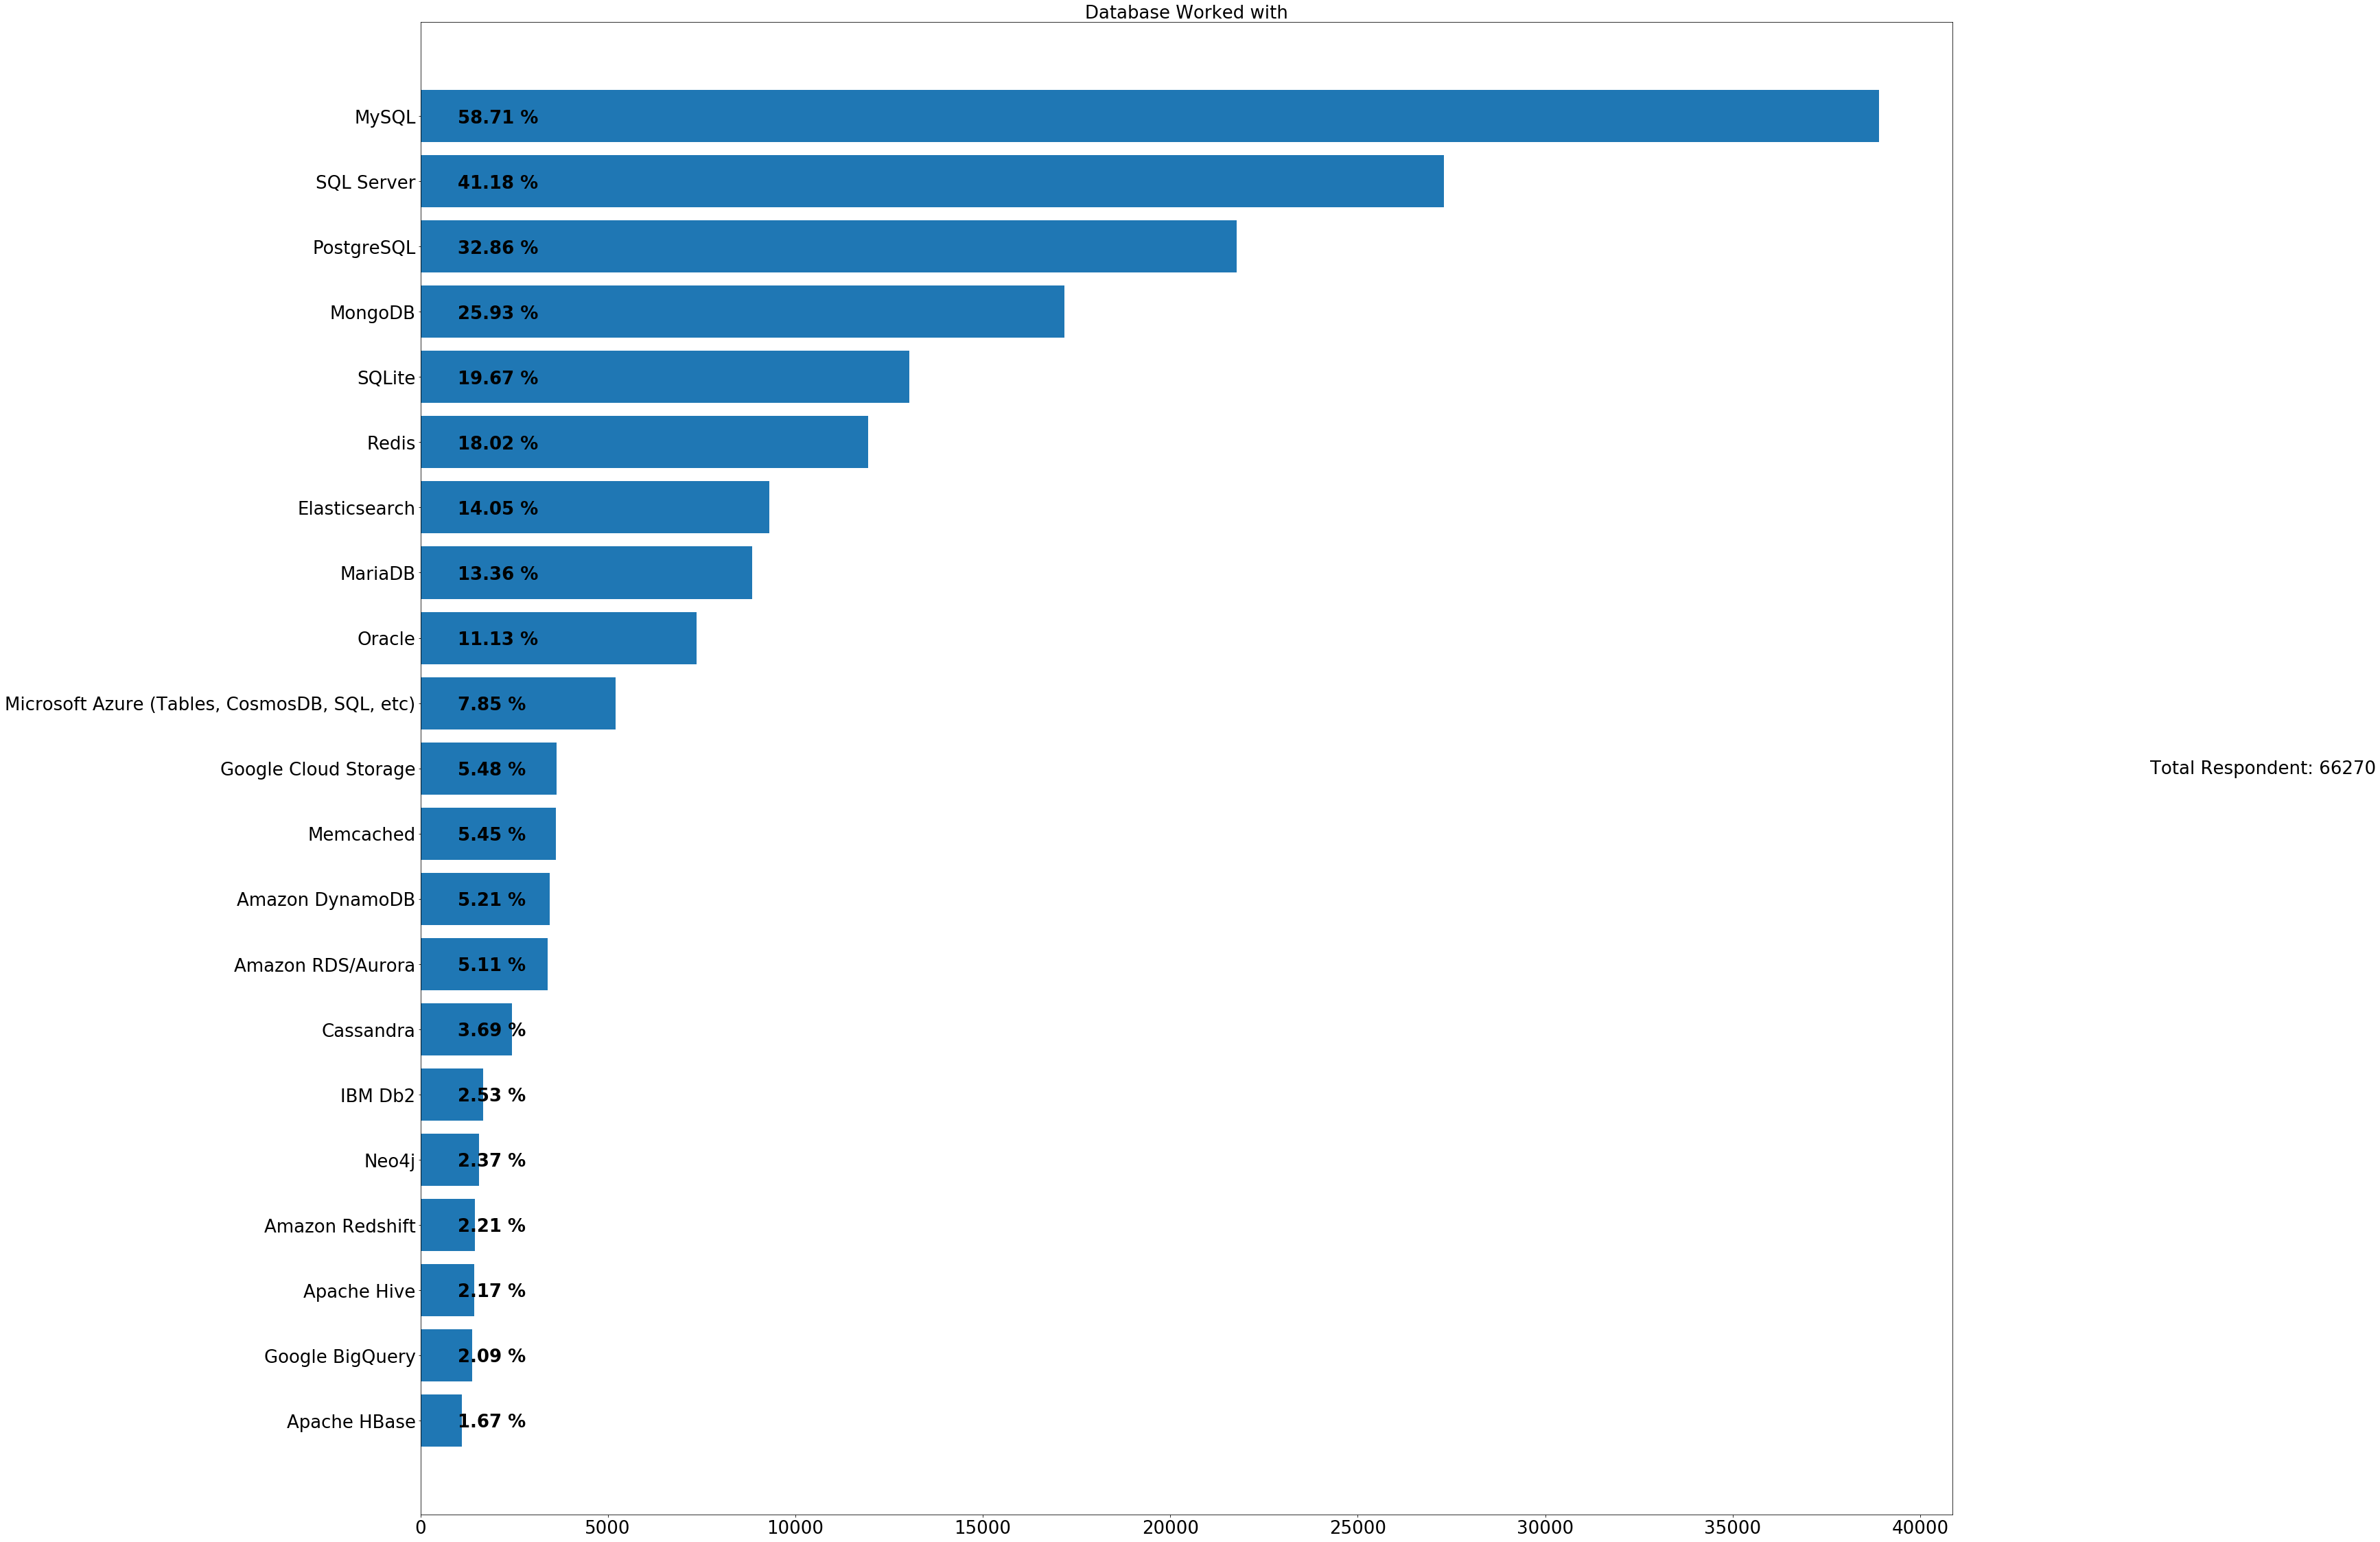

In [33]:
# Plot Database system
plt.figure(figsize=(40, 40))
plt.barh(range(len(database)), db_count)
plt.yticks(range(len(database)), database, rotation=360, fontsize=26)
plt.xticks(fontsize=26)
plt.title('Database Worked with', fontsize=26)

for i, v in enumerate(db_count):
    percent = (v/len(database_df)) * 100
    plt.text(1000, i - 0.10 , "{0:.2f} %".format(percent), color='black', fontweight='bold', fontsize=26)

plt.gcf().text(1, 0.5, f'Total Respondent: {len(database_df)}', fontsize=26)
plt.savefig('Images/database-barplot-h.png', bbox_inches='tight')

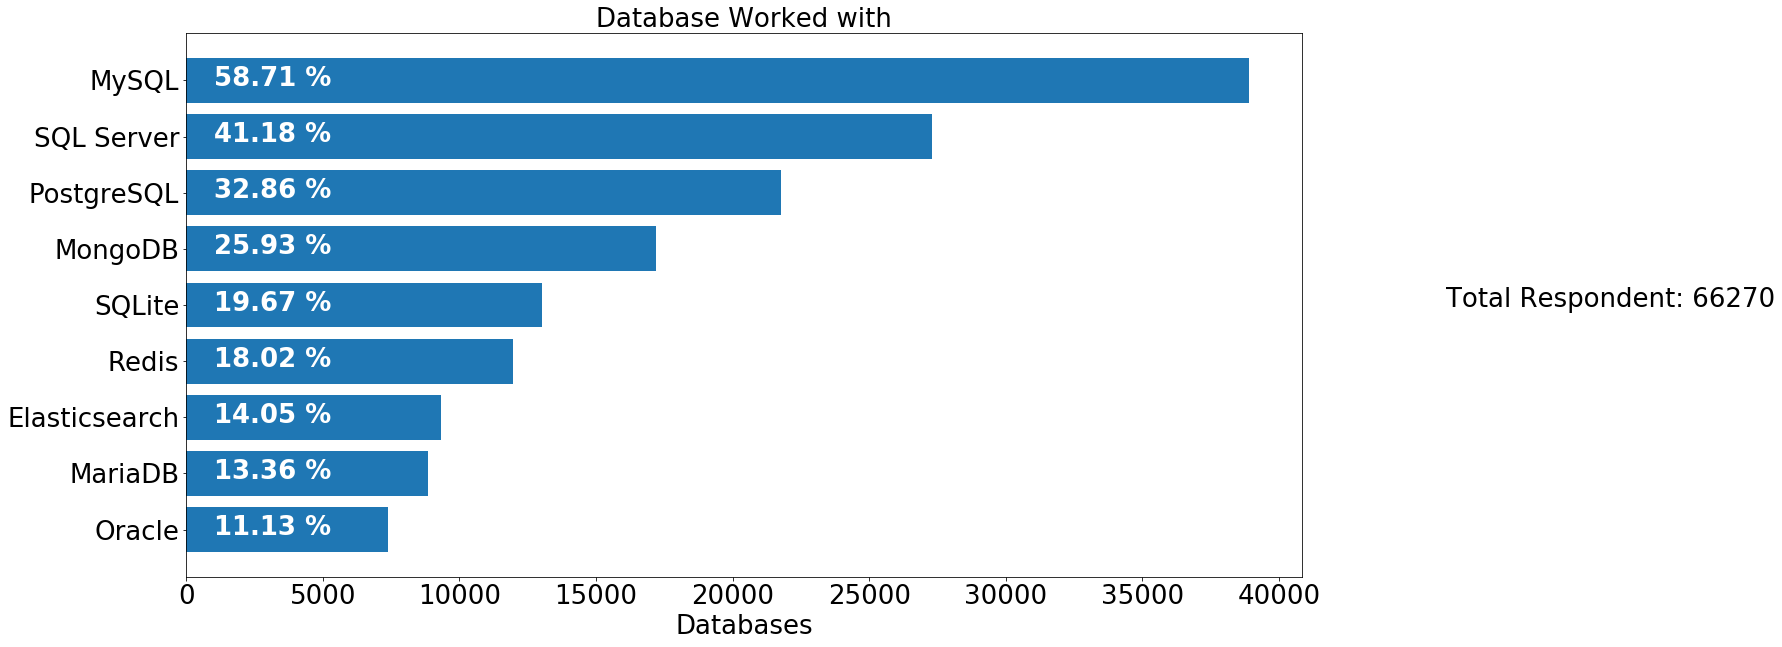

In [38]:
# Plot Database system
plt.figure(figsize=(20, 10))
plt.barh(range(len(database[-9:])), db_count[-9:])
plt.yticks(range(len(database[-9:])), database[-9:], rotation=360, fontsize=26)
plt.xticks(fontsize=26)
plt.title('Database Worked with', fontsize=26)
plt.xlabel('Databases', fontsize=26)

for i, v in enumerate(db_count[-9:]):
    percent = (v/len(database_df)) * 100
    plt.text(1000, i - 0.10 , "{0:.2f} %".format(percent), color='white', fontweight='bold', fontsize=26)

plt.gcf().text(1, 0.5, f'Total Respondent: {len(database_df)}', fontsize=26)
plt.savefig('Images/database-top10-barplot-h.png', bbox_inches='tight')